<a href="https://colab.research.google.com/github/Krithikasrini/Scaler_BusinessCaseStudies/blob/main/Ola_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as s
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

**Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.**



In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df['City'].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

In [ ]:
df['Education_Level'].value_counts()

1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

<Axes: >

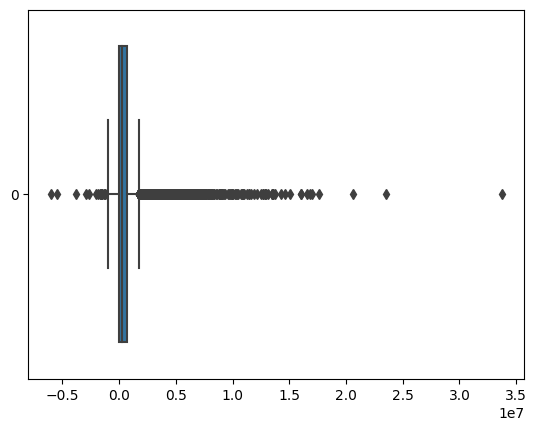

In [ ]:
sns.boxplot(data = df['Total Business Value'],orient='h')

<Axes: >

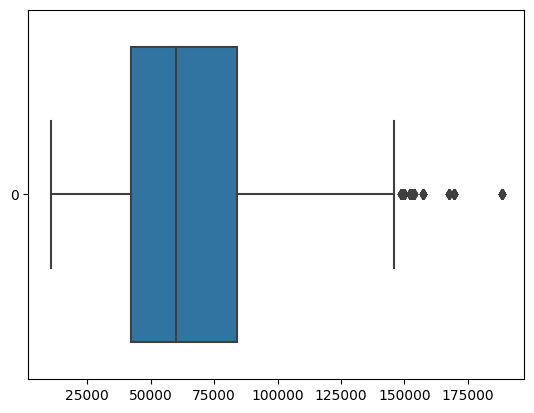

In [ ]:
sns.boxplot(data = df['Income'],orient='h')

<Axes: xlabel='Gender', ylabel='count'>

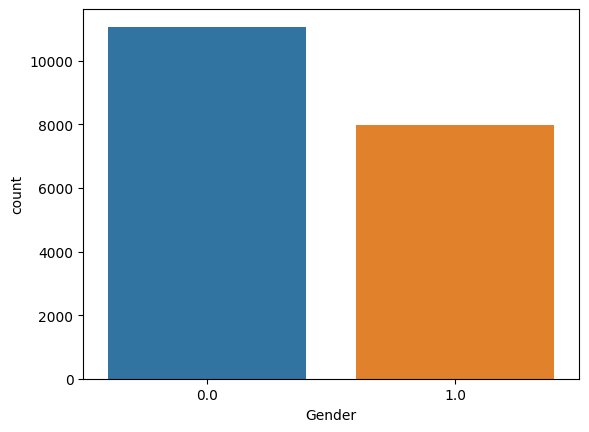

In [ ]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Quarterly Rating', ylabel='count'>

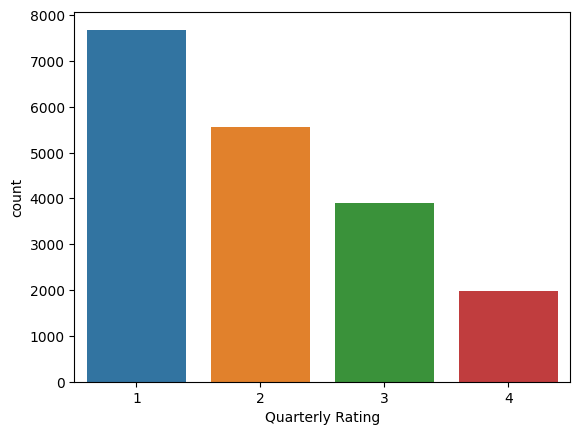

In [ ]:
sns.countplot(x='Quarterly Rating',data=df)

<Axes: xlabel='Education_Level', ylabel='Count'>

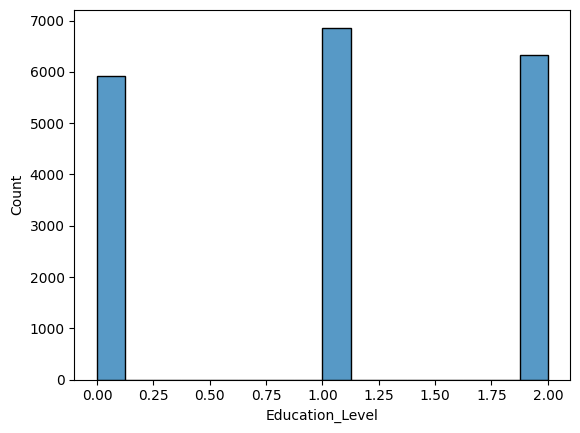

In [ ]:
sns.histplot(data=df, x="Education_Level")

In [ ]:
pd.crosstab(df.Gender,df.Education_Level,margins=True)

Education_Level,0,1,2,All
Gender,,,,
0.0,3439,3874,3761,11074
1.0,2453,2971,2554,7978
All,5892,6845,6315,19052


In [ ]:
df['Quarterly_Rating'] = df['Quarterly Rating']

In [ ]:
pd.crosstab(df.Gender,df.Quarterly_Rating,margins=True)

Quarterly_Rating,1,2,3,4,All
Gender,,,,,
0.0,4519,3125,2315,1115,11074
1.0,3135,2417,1566,860,7978
All,7654,5542,3881,1975,19052


 Convert date-like features to their respective data type**

In [ ]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

In [ ]:
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  object        
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1


**Check for missing values and Prepare data for KNN Imputation**

In [ ]:
df = df.drop(['Unnamed: 0','MMM-YY'],axis=1)

In [ ]:
df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating
0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2
1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2
3,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1
4,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,1


In [ ]:
df_knn = df.drop(['Income','Dateofjoining','Total Business Value','LastWorkingDate','Quarterly_Rating'],axis=1)

In [ ]:
# Converting the Variables data types as catogory and encoding them for modelling

df_knn['Driver_ID'] = df_knn['Driver_ID'].astype('category')
df_knn['Driver_ID_cat'] = df_knn['Driver_ID'].cat.codes

df_knn['City'] = df_knn['City'].astype('category')
df_knn['City_cat'] = df_knn['City'].cat.codes

df_knn['Education_Level'] = df_knn['Education_Level'].astype('category')
df_knn['Education_Level_cat'] = df_knn['Education_Level'].cat.codes

df_knn['Joining Designation'] = df_knn['Joining Designation'].astype('category')
df_knn['Joining Designation_cat'] = df_knn['Joining Designation'].cat.codes

df_knn['Grade'] = df_knn['Grade'].astype('category')
df_knn['Grade_cat'] = df_knn['Grade'].cat.codes

df_knn['Quarterly Rating'] = df_knn['Quarterly Rating'].astype('category')
df_knn['Quarterly Rating_cat'] = df_knn['Quarterly Rating'].cat.codes

In [ ]:
# Dropping all the Columns with Strings and using only their encoded versions
df_knn = df_knn.drop(['Driver_ID','City','Education_Level','Joining Designation','Grade','Quarterly Rating'],axis=1)

In [ ]:
df_knn

,Age,Gender,Driver_ID_cat,City_cat,Education_Level_cat,Joining Designation_cat,Grade_cat,Quarterly Rating_cat
0,28.0,0.0,0,15,2,0,0,1
1,28.0,0.0,0,15,2,0,0,1
2,28.0,0.0,0,15,2,0,0,1
3,31.0,0.0,1,26,2,1,1,0
4,31.0,0.0,1,26,2,1,1,0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2380,19,2,1,1,2
19100,30.0,0.0,2380,19,2,1,1,2
19101,30.0,0.0,2380,19,2,1,1,1
19102,30.0,0.0,2380,19,2,1,1,1


In [ ]:
df_knn.isna().sum()

Age                         0
Gender                     52
Driver_ID_cat               0
City_cat                    0
Education_Level_cat         0
Joining Designation_cat     0
Grade_cat                   0
Quarterly Rating_cat        0
dtype: int64

In [ ]:
df_knn_age = df_knn.drop(['Gender',],axis=1)

In [ ]:
df_knn_age.columns

Index(['Age', 'Driver_ID_cat', 'City_cat', 'Education_Level_cat',
       'Joining Designation_cat', 'Grade_cat', 'Quarterly Rating_cat'],
      dtype='object')

In [ ]:
test_1 = df_knn_age[df_knn_age.isna().any(axis=1)]

In [ ]:
test_1

,Age,Driver_ID_cat,City_cat,Education_Level_cat,Joining Designation_cat,Grade_cat,Quarterly Rating_cat


In [ ]:
df_knn_age = df_knn_age.dropna()

In [ ]:
# Scalling the Values except the Traget Variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_knn_age.drop(['Age'],axis=1))
scaled_features = scaler.transform(df_knn_age.drop(['Age'],axis=1))

In [ ]:
scaled_feat_col = ['Driver_ID','City','Education_Level','Joining Designation','Grade','Quarterly Rating']
df_feat = pd.DataFrame(scaled_features,columns=scaled_feat_col)
df_feat.head()

,Driver_ID,City,Education_Level,Joining Designation,Grade,Quarterly Rating
0,-1.745523,0.106562,1.222991,-0.825444,-1.221377,-0.009673
1,-1.745523,0.106562,1.222991,-0.825444,-1.221377,-0.009673
2,-1.745523,0.106562,1.222991,-0.825444,-1.221377,-0.009673
3,-1.744076,1.436109,1.222991,0.369003,-0.247477,-0.999965
4,-1.744076,1.436109,1.222991,0.369003,-0.247477,-0.999965


In [ ]:
# Creating a KNN model with df_feat
X = df_feat
y = df_knn_age['Age']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=99)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_valid)
pred

array([46., 30., 34., ..., 40., 24., 35.])

In [ ]:
# Calculating the accuracy score
from sklearn.metrics import accuracy_score as acc
print('Accuracy of the model is ',acc(y_valid,pred))

Accuracy of the model is  0.6593476531424025


In [ ]:
# Creating instance of KNN
knn = KNeighborsClassifier(n_neighbors = 25)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting over the Train Set and calculating accuracy score
valid_predict = knn.predict(X_valid)
k = acc(valid_predict, y_valid)
print('Test Accuracy Score    ', k )

Test Accuracy Score     0.2243436754176611


In [ ]:
# Scalling the Values except the Target Variable

scaler = StandardScaler()
scaler.fit(test_1.drop(['Age'],axis=1))
scaled_features = scaler.transform(test_1.drop(['Age'],axis=1))
X_test = pd.DataFrame(scaled_features,columns=scaled_feat_col)

In [ ]:
pred1 = knn.predict(X_test)

In [ ]:
pred1 = pd.DataFrame(pred1,columns=['Age'])

In [ ]:
# Replacing the missing values in Product_category_2 with the predicted values
gen_alt = (alt for alt in pred1['Age'])
for count, ele in enumerate(df.Age):
    if not pd.isna(ele): continue
    try:
        df['Age'][count] = next(gen_alt)
    except StopIteration:
        break

<ipython-input-78-b3fd119e0874>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][count] = next(gen_alt)


In [ ]:
df.isna().sum()

Driver_ID                   0
Age                         0
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
Quarterly_Rating            0
dtype: int64

In [ ]:
df.Age.value_counts().sort_index()

21.0      36
22.0      93
23.0     193
24.0     277
25.0     451
26.0     570
27.0     749
28.0     772
29.0    1018
30.0    1150
31.0    1081
32.0    1148
33.0    1253
34.0    1238
35.0    1142
36.0    1284
37.0     862
38.0     858
39.0     792
40.0     702
41.0     662
42.0     479
43.0     399
44.0     408
45.0     372
46.0     351
47.0     224
48.0     144
49.0      99
50.0      69
51.0      72
52.0      78
53.0      26
54.0      24
55.0      21
58.0       7
Name: Age, dtype: int64

In [ ]:
test_2 = df_knn[df_knn.isna().any(axis=1)]

In [ ]:
data_2 = df_knn.dropna()

In [ ]:
# Scaling the Independent Variables
scaler = StandardScaler()
scaler.fit(data_2.drop(['Gender'],axis=1))
scaled_features = scaler.transform(data_2.drop(['Gender'],axis=1))

In [ ]:
data_2

,Age,Gender,Driver_ID_cat,City_cat,Education_Level_cat,Joining Designation_cat,Grade_cat,Quarterly Rating_cat
0,28.0,0.0,0,15,2,0,0,1
1,28.0,0.0,0,15,2,0,0,1
2,28.0,0.0,0,15,2,0,0,1
3,31.0,0.0,1,26,2,1,1,0
4,31.0,0.0,1,26,2,1,1,0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2380,19,2,1,1,2
19100,30.0,0.0,2380,19,2,1,1,2
19101,30.0,0.0,2380,19,2,1,1,1
19102,30.0,0.0,2380,19,2,1,1,1


In [ ]:
# Creating dataframe with the scaled features
scaled_feat_col = ['Age','Driver_ID','City','Education_Level','Joining Designation','Grade','Quarterly Rating']
df_feat = pd.DataFrame(scaled_features,columns=scaled_feat_col)
df_feat.head()

,Age,Driver_ID,City,Education_Level,Joining Designation,Grade,Quarterly Rating
0,-1.067275,-1.744488,0.106242,1.22203,-0.825561,-1.221302,-0.009199
1,-1.067275,-1.744488,0.106242,1.22203,-0.825561,-1.221302,-0.009199
2,-1.067275,-1.744488,0.106242,1.22203,-0.825561,-1.221302,-0.009199
3,-0.587525,-1.743041,1.435760,1.22203,0.369530,-0.247042,-0.999338
4,-0.587525,-1.743041,1.435760,1.22203,0.369530,-0.247042,-0.999338


In [ ]:
df_feat.isna().sum()

Age                    0
Driver_ID              0
City                   0
Education_Level        0
Joining Designation    0
Grade                  0
Quarterly Rating       0
dtype: int64

In [ ]:
# Creating a KNN model with df_feat
X = df_feat
y = data_2['Gender']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=99)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_valid)
pred

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
# Calculating the accuracy score
from sklearn.metrics import accuracy_score as acc
print('Accuracy of the model is ',acc(y_valid,pred))

Accuracy of the model is  0.9724872773536896


In [ ]:
# Creating instance of KNN
knn = KNeighborsClassifier(n_neighbors = 40)

# Fitting the model
knn.fit(X_train, y_train)

# Predicting over the Train Set and calculating accuracy score
valid_predict = knn.predict(X_valid)
k = acc(valid_predict, y_valid)
print('Test Accuracy Score    ', k )

Test Accuracy Score     0.7102417302798982


In [ ]:
test_2

,Age,Gender,Driver_ID_cat,City_cat,Education_Level_cat,Joining Designation_cat,Grade_cat,Quarterly Rating_cat
240,27.0,NaN,31,6,0,0,0,0
258,21.0,NaN,36,12,0,0,1,0
264,21.0,NaN,36,12,0,0,1,1
466,31.0,NaN,54,21,0,0,2,2
820,21.0,NaN,97,2,0,0,0,0
859,31.0,NaN,100,21,1,2,2,0
1514,32.0,NaN,192,5,0,2,2,2
1892,31.0,NaN,249,12,1,0,1,1
2277,31.0,NaN,300,2,0,0,0,0
2359,24.0,NaN,310,14,0,1,1,0


In [ ]:
# Scalling the Values except the Target Variable

scaler = StandardScaler()
scaler.fit(test_2.drop(['Gender'],axis=1))
scaled_features = scaler.transform(test_2.drop(['Gender'],axis=1))
X_test = pd.DataFrame(scaled_features,columns=scaled_feat_col)

In [ ]:
X_test

,Age,Driver_ID,City,Education_Level,Joining Designation,Grade,Quarterly Rating
0,-0.454201,-1.379729,-0.861070,-1.063432,-0.659276,-0.925820,-0.919517
1,-1.466420,-1.373432,-0.089076,-1.063432,-0.659276,0.077152,-0.919517
2,-1.466420,-1.373432,-0.089076,-1.063432,-0.659276,0.077152,0.143036
3,0.220612,-1.350763,1.068914,-1.063432,-0.659276,1.080123,1.205589
4,-1.466420,-1.296607,-1.375732,-1.063432,-0.659276,-0.925820,-0.919517
5,0.220612,-1.292829,1.068914,0.222579,1.552489,1.080123,-0.919517
6,0.389315,-1.176961,-0.989735,-1.063432,1.552489,1.080123,1.205589
7,0.220612,-1.105174,-0.089076,0.222579,-0.659276,0.077152,0.143036
8,0.220612,-1.040943,-1.375732,-1.063432,-0.659276,-0.925820,-0.919517
9,-0.960310,-1.028349,0.168255,-1.063432,0.446606,0.077152,-0.919517


In [ ]:
pred2 = knn.predict(X_test)

In [ ]:
pred2 = pd.DataFrame(pred2,columns=['Gender'])

In [ ]:
# Replacing the missing values in Product_category_2 with the predicted values
gen_alt = (alt for alt in pred2['Gender'])
for count, ele in enumerate(df.Gender):
    if not pd.isna(ele): continue
    try:
        df['Gender'][count] = next(gen_alt)
    except StopIteration:
        break

<ipython-input-99-2b1eaa04e111>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][count] = next(gen_alt)


In [ ]:
df.Gender.value_counts().sort_index()

0.0    11112
1.0     7992
Name: Gender, dtype: int64

 **Feature Engineering Steps**

**Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1**

In [ ]:
df["rating_diff"]=df.groupby(['Driver_ID'])['Quarterly Rating'].diff()

In [ ]:
df['rating_increase'] = np.where(df['rating_diff'] >= 1, 1, 0)

In [ ]:
df['rating_increase'].value_counts()

0    17859
1     1245
Name: rating_increase, dtype: int64

**Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1**

In [ ]:
driver_last_working_date = df.set_index('Driver_ID')['LastWorkingDate'].dropna().to_dict()

# Create the 'target' column

df['target'] = df['Driver_ID'].map(driver_last_working_date)

df['target'] = df['target'].notnull().astype(int)

In [ ]:
df['target'].value_counts()

1    10359
0     8745
Name: target, dtype: int64

**Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1**



In [ ]:
df["income_diff"]=df.groupby(['Driver_ID'])['Income'].diff()

In [ ]:
df['income_increase'] = np.where(df['income_diff'] >= 1, 1, 0)

In [ ]:
df['income_increase'].value_counts()

0    19060
1       44
Name: income_increase, dtype: int64

**Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)**



In [ ]:
ola_dict={
'Age' : 'last',
'Gender' : 'first',
'City': 'first',
'Education_Level' : 'first',
'Income' :'last',
'LastWorkingDate' : 'first',
'Dateofjoining' : 'first',
'Joining Designation' : 'first',
'Grade' : 'last',
'Total Business Value' : 'sum',
'Quarterly Rating' : 'max',
'rating_increase' : 'max',
'Churn' : 'first',
'income_increase' : 'max'}
df_agg=df.groupby('Driver_ID').agg(ola_dict)
df_agg.reset_index(inplace=True)
df_agg.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,Churn,income_increase
0,1,28.0,0.0,C23,2,57387,2019-03-11,2018-12-24,1,1,1715580,2,0,1,0
1,2,31.0,0.0,C7,2,67016,NaT,2020-11-06,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2020-04-27,2019-12-07,2,2,350000,1,0,1,0
3,5,29.0,0.0,C9,0,46368,2019-03-07,2019-01-09,1,1,120360,1,0,1,0
4,6,31.0,1.0,C11,1,78728,NaT,2020-07-31,3,3,1265000,2,1,0,0


In [ ]:
df_agg

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,Churn,income_increase,churn_prediction
0,1,28.0,0.0,C23,2,57387,2019-03-11,2018-12-24,1,1,1715580,2,0,1,0,1
1,2,31.0,0.0,C7,2,67016,NaT,2020-11-06,2,2,0,1,0,0,0,1
2,4,43.0,0.0,C13,2,65603,2020-04-27,2019-12-07,2,2,350000,1,0,1,0,1
3,5,29.0,0.0,C9,0,46368,2019-03-07,2019-01-09,1,1,120360,1,0,1,0,1
4,6,31.0,1.0,C11,1,78728,NaT,2020-07-31,3,3,1265000,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,NaT,2015-10-15,2,3,21748820,4,1,0,0,0
2377,2785,34.0,1.0,C9,0,12105,2020-10-28,2020-08-28,1,1,0,1,0,1,0,1
2378,2786,45.0,0.0,C19,0,35370,2019-09-22,2018-07-31,2,2,2815090,2,0,1,0,1
2379,2787,28.0,1.0,C20,2,69498,2019-06-20,2018-07-21,1,1,977830,2,0,1,0,1


In [ ]:
df_agg['Churn'].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [ ]:
df_agg['churn_prediction'].value_counts()

1    1939
0     442
Name: churn_prediction, dtype: int64

In [ ]:
df_agg.shape

(2381, 15)

**Check correlation among independent variables and how they interact with each other**

<ipython-input-147-8671f8cb4852>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_agg.corr(), center = 0,cmap='BrBG',annot=True)


<Axes: >

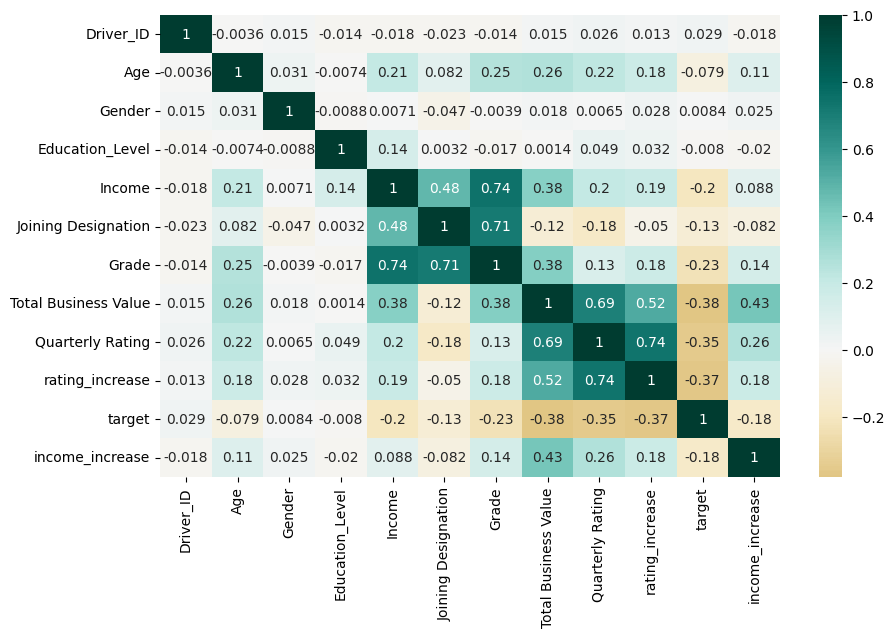

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_agg.corr(), center = 0,cmap='BrBG',annot=True)

<Axes: xlabel='Grade', ylabel='count'>

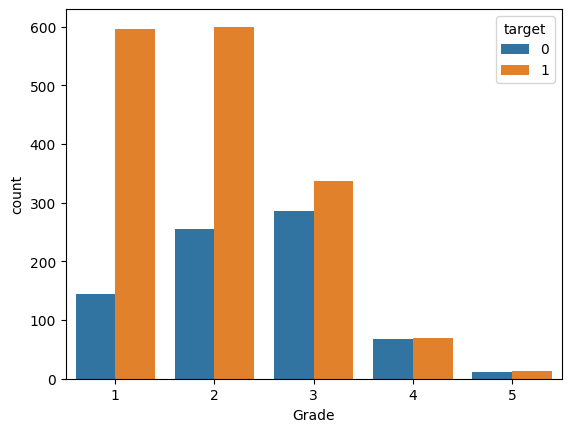

In [ ]:
sns.countplot(x='Grade',data=df_agg,hue='target')

<Axes: xlabel='rating_increase', ylabel='count'>

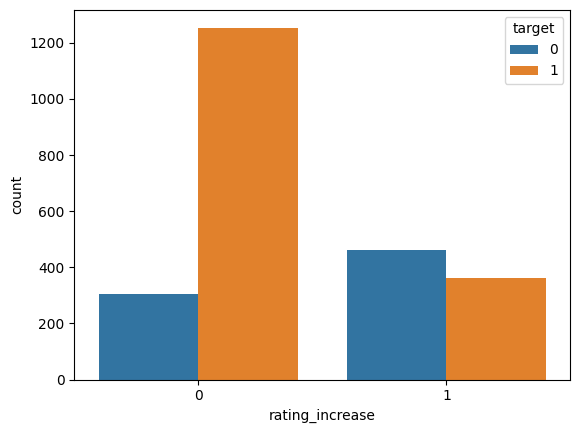

In [ ]:
sns.countplot(x='rating_increase',data=df_agg,hue='target')

<Axes: xlabel='income_increase', ylabel='count'>

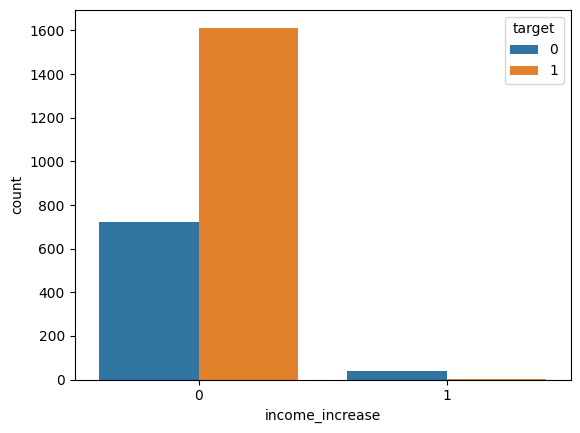

In [ ]:
sns.countplot(x='income_increase',data=df_agg,hue='target')

<Axes: xlabel='Gender', ylabel='count'>

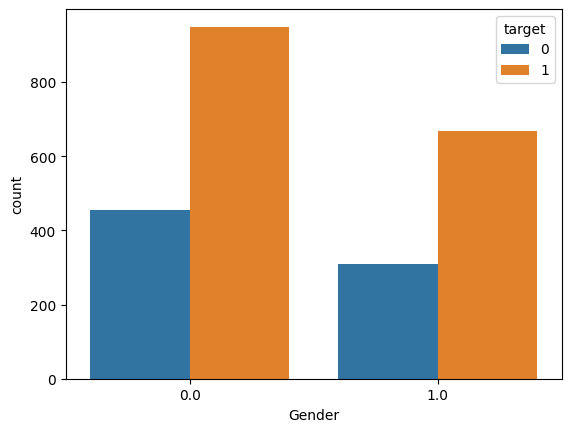

In [ ]:
sns.countplot(x='Gender',data=df_agg,hue='target')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
col_labels = ['Gender','Grade','Education_Level','Quarterly Rating','City']

In [ ]:
df_agg[col_labels] = df_agg[col_labels].apply(LabelEncoder().fit_transform)

In [ ]:
df_agg

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,target,income_increase
0,1,28.0,0,15,2,57387,2019-03-11,2018-12-24,1,0,1715580,1,0,1,0
1,2,31.0,0,26,2,67016,NaT,2020-11-06,2,1,0,0,0,0,0
2,4,43.0,0,4,2,65603,2020-04-27,2019-12-07,2,1,350000,0,0,1,0
3,5,29.0,0,28,0,46368,2019-03-07,2019-01-09,1,0,120360,0,0,1,0
4,6,31.0,1,2,1,78728,NaT,2020-07-31,3,2,1265000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0,16,0,82815,NaT,2015-10-15,2,2,21748820,3,1,0,0
2377,2785,34.0,1,28,0,12105,2020-10-28,2020-08-28,1,0,0,0,0,1,0
2378,2786,45.0,0,10,0,35370,2019-09-22,2018-07-31,2,1,2815090,1,0,1,0
2379,2787,28.0,1,12,2,69498,2019-06-20,2018-07-21,1,0,977830,1,0,1,0


In [ ]:
df_agg.shape

(2381, 15)

In [ ]:
df_agg = df_agg.drop(['LastWorkingDate','Dateofjoining','City'],axis=1)

In [ ]:
df_agg.rename(columns = {'target':'Churn'}, inplace = True)

In [ ]:
X = df_agg.drop(['Churn'],axis=1)
Y = df_agg['Churn']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
Y_train.value_counts()

1    1456
0     686
Name: Churn, dtype: int64

**Standardization of training data**

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
standardized_X = minmaxscaler.fit_transform(X)

In [ ]:
standardized_trainX = minmaxscaler.fit_transform(X_train)

In [ ]:
standardized_testX = minmaxscaler.transform(X_test)

In [ ]:
standardized_X.shape

(2381, 11)

In [ ]:
rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [ ]:
rf.fit(standardized_trainX, Y_train)

RandomForestClassifier(max_features=5)

In [ ]:
rf.score(standardized_testX, Y_test)

0.7782426778242678

In [ ]:
Y_pred = rf.predict(standardized_testX)

In [ ]:
Y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(Y_pred, Y_test)

0.7782426778242678

**Classification Report**

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       330
           1       0.76      0.82      0.79       330

    accuracy                           0.78       660
   macro avg       0.78      0.78      0.78       660
weighted avg       0.78      0.78      0.78       660



In [ ]:
nb = GaussianNB()
nb.fit(standardized_trainX, Y_train)

GaussianNB()

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(standardized_testX)
nb_probs = nb.predict_proba(standardized_testX)

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

**Computing AUROC and ROC curve values**

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.859
Naive Bayes: AUROC = 0.819


In [ ]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

**Plot the ROC curve**

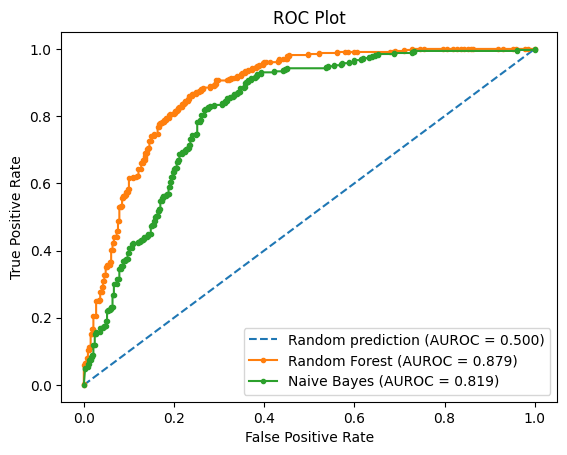

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

In [ ]:
Y_pred, Y_test

(array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
grid.fit(standardized_testX, Y_test)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 2, 'n_estimators': 100} with a score of 0.81


**Dataframe of Grid search parameters and their Accuracy scores**

In [ ]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.751515
1,1,20,0.765152
2,1,30,0.780303
3,1,40,0.784848
4,1,50,0.789394


**Preparing data for making contour plots**

In [ ]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.751515
             20            0.765152
             30            0.780303
             40            0.784848
             50            0.789394
...                             ...
5            160           0.786364
             170           0.772727
             180           0.777273
             190           0.771212
             200           0.784848

[100 rows x 1 columns]

**Pivoting the data**

In [ ]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

<ipython-input-73-f7cd6ee824b7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grid_pivot = grid_reset.pivot('max_features', 'n_estimators')


Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.751515  0.765152  0.780303  0.784848  0.789394  0.786364   
2             0.772727  0.763636  0.803030  0.780303  0.789394  0.787879   
3             0.775758  0.768182  0.781818  0.780303  0.777273  0.778788   
4             0.728788  0.754545  0.765152  0.784848  0.768182  0.787879   
5             0.760606  0.763636  0.778788  0.789394  0.783333  0.783333   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.787879  0.786364  0.787879  0.787879  0.787879  0.796970   
2             0.786364  0.789394  0.795455  0.806061  0.796970  0.787879   
3             0.774242  0.787879  0.795455  0.789394  0.792424  0.798485   
4             0.781818  0.772727  0.790909  0.790909  0.771212  0.789394   
5             0.780303  0.780303  0.783333  0.787879  0.789394  0.763636   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.789394  0.793939  0.801515  0.796970  0.798485  0.793939   
2             0.801515  0.792424  0.786364  0.789394  0.789394  0.787879   
3             0.771212  0.796970  0.792424  0.790909  0.784848  0.786364   
4             0.792424  0.780303  0.786364  0.789394  0.783333  0.780303   
5             0.774242  0.780303  0.775758  0.786364  0.772727  0.777273   

                                  
n_estimators       190       200  
max_features                      
1             0.790909  0.793939  
2             0.790909  0.798485  
3             0.789394  0.790909  
4             0.781818  0.777273  
5             0.771212  0.784848

In [ ]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

**2D Contour Plot**

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features')
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

**Gradient Boosting Technique**

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

In [ ]:
gbc.fit(standardized_trainX, Y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
gbc.score(standardized_testX, Y_test)

0.7573221757322176

In [ ]:
gbc.score(standardized_trainX, Y_train)

0.8025210084033614

In [ ]:
gbc.fit(X, Y)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
parameters = {'n_estimators' : sp_randInt(100,1000),
              'max_depth' : sp_randInt(4,10)
              }
model = GradientBoostingClassifier()

randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=2,n_iter=2,n_jobs=1)

In [ ]:
randm.fit(standardized_trainX, Y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=2,
                   n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ead83dd84f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ead83dd7c70>})

In [ ]:
gbc.score(X, Y)

0.7979840403191936

In [ ]:
Y_pred_gbc = gbc.predict(X)
Y_pred_gbc

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
Y_pred_gbc_test = gbc.predict(standardized_testX)
Y_pred_gbc_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
Y_pred_gbc_train = gbc.predict(standardized_X)
Y_pred_gbc_train

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
randm.best_estimator_

GradientBoostingClassifier(max_depth=7, n_estimators=399)

**Classification report**

In [ ]:
print(classification_report(Y_test,Y_pred_gbc))

NameError: ignored

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = gbc.predict_proba(standardized_testX)
nb_probs = nb.predict_proba(standardized_testX)

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Gradient Boosting : AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Gradient Boosting : AUROC = 0.879
Naive Bayes: AUROC = 0.819


In [ ]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

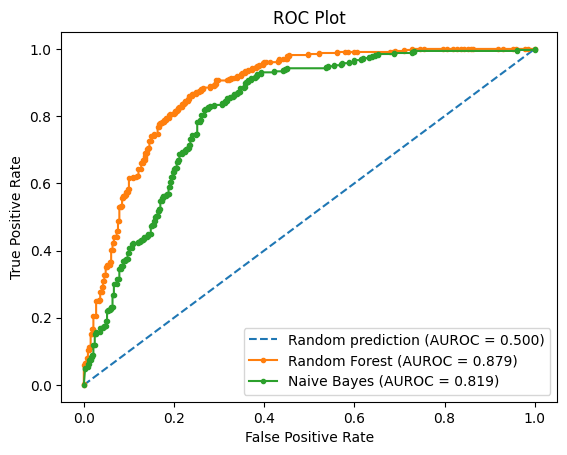

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

**Exporting to Dashboard Preparation**

In [ ]:
df_agg['churn_prediction'] = Y_pred_gbc

In [ ]:
df_agg

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,rating_increase,Churn,income_increase,churn_prediction
0,1,28.0,0.0,C23,2,57387,2019-03-11,2018-12-24,1,1,1715580,2,0,1,0,1
1,2,31.0,0.0,C7,2,67016,NaT,2020-11-06,2,2,0,1,0,0,0,1
2,4,43.0,0.0,C13,2,65603,2020-04-27,2019-12-07,2,2,350000,1,0,1,0,1
3,5,29.0,0.0,C9,0,46368,2019-03-07,2019-01-09,1,1,120360,1,0,1,0,1
4,6,31.0,1.0,C11,1,78728,NaT,2020-07-31,3,3,1265000,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,NaT,2015-10-15,2,3,21748820,4,1,0,0,0
2377,2785,34.0,1.0,C9,0,12105,2020-10-28,2020-08-28,1,1,0,1,0,1,0,1
2378,2786,45.0,0.0,C19,0,35370,2019-09-22,2018-07-31,2,2,2815090,2,0,1,0,1
2379,2787,28.0,1.0,C20,2,69498,2019-06-20,2018-07-21,1,1,977830,2,0,1,0,1


In [ ]:
from google.colab import files
df_agg.to_csv('ola_churn.csv')
files.download('ola_churn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>